In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from graphviz import pipe_lines
from mlflow import catboost
from narwhals.selectors import categorical
from pandas.core.common import random_state
from scipy.constants import precision
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Binarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
from sklearn.metrics import average_precision_score
import mlflow
from catboost import CatBoostRegressor 
mlflow.set_registry_uri('./mlruns')
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from sklearn.preprocessing import OrdinalEncoder


from sklearn.preprocessing import StandardScaler








In [3]:
df = pd.read_csv('data/brain_tumor_dataset.csv')
df

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Negative,Yes
19996,19997,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

In [5]:
df.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Tumor_Type              object
Tumor_Size             float64
Location                object
Histology               object
Stage                   object
Symptom_1               object
Symptom_2               object
Symptom_3               object
Radiation_Treatment     object
Surgery_Performed       object
Chemotherapy            object
Survival_Rate          float64
Tumor_Growth_Rate      float64
Family_History          object
MRI_Result              object
Follow_Up_Required      object
dtype: object

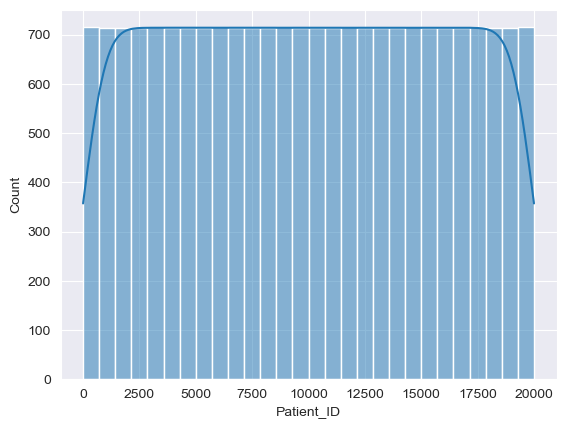

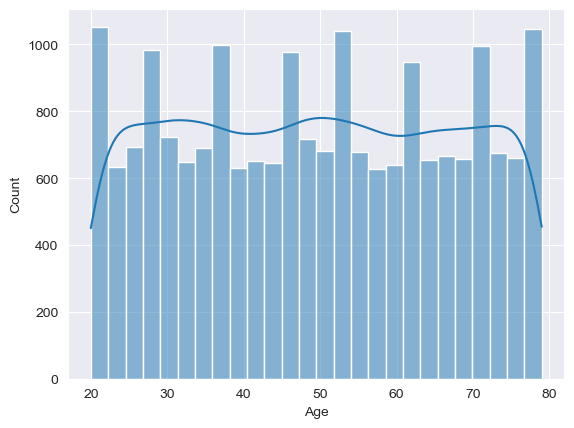

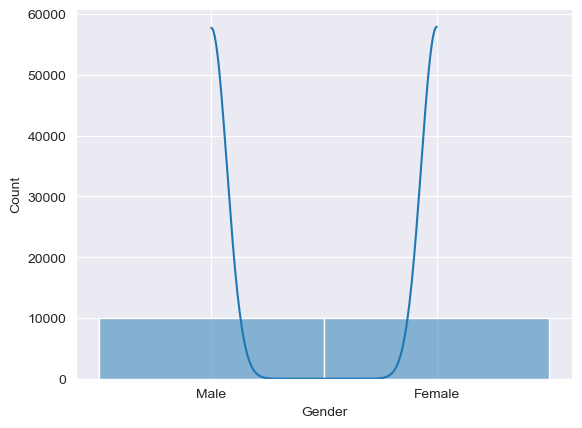

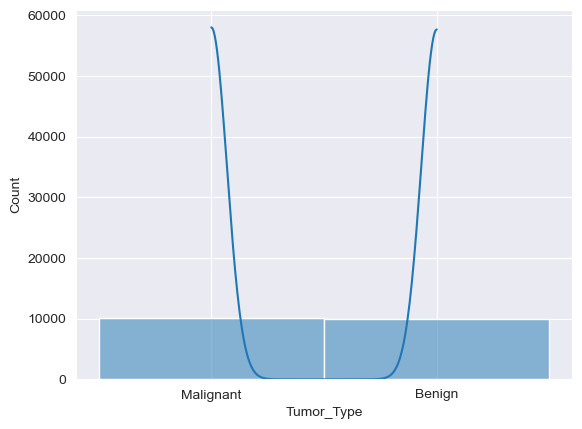

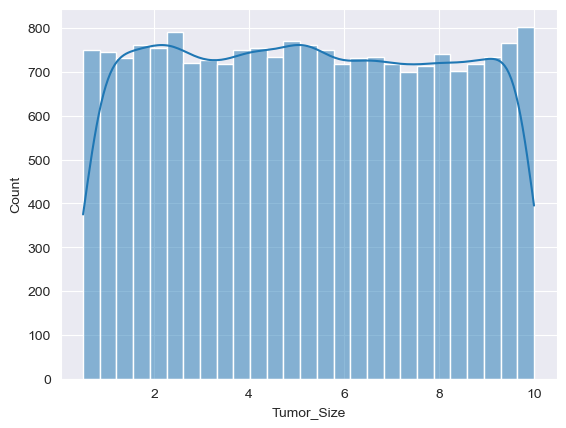

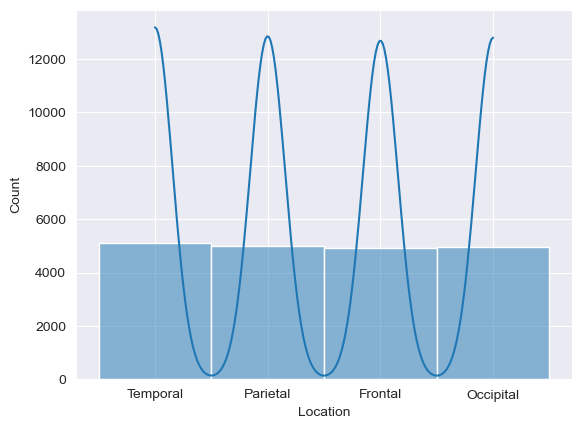

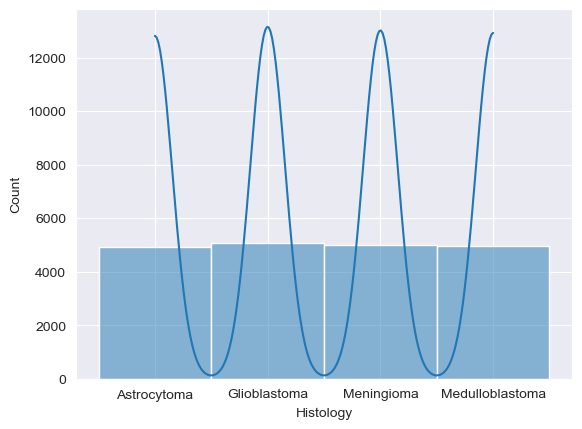

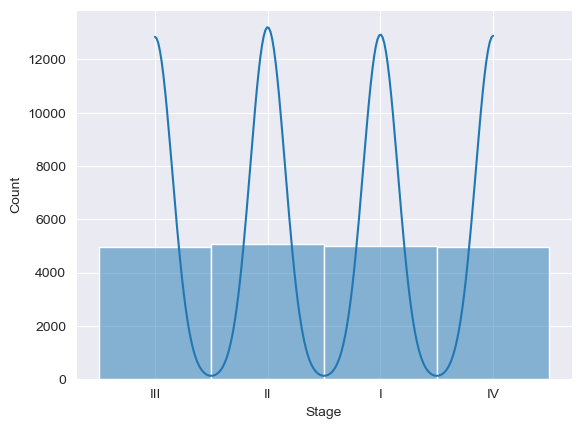

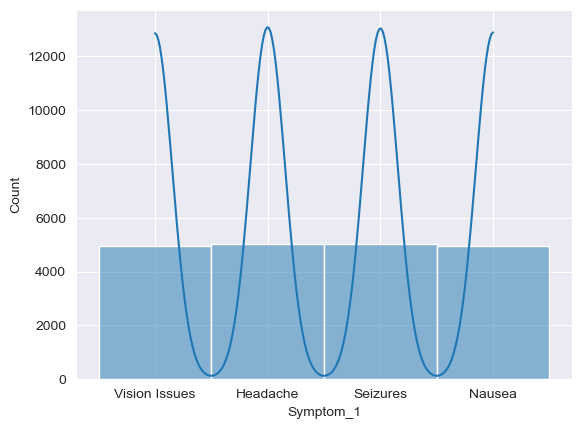

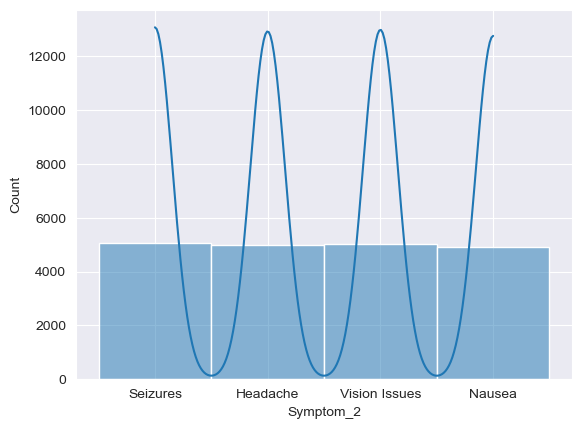

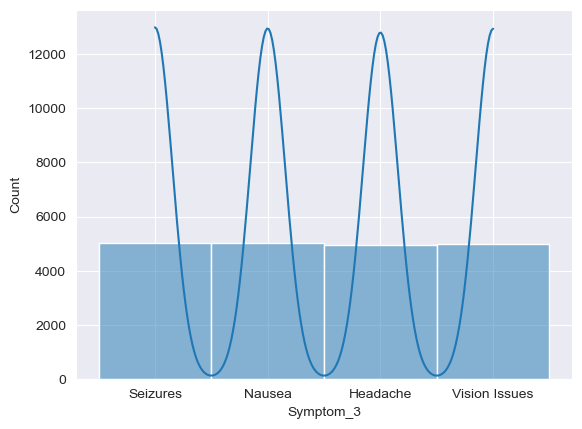

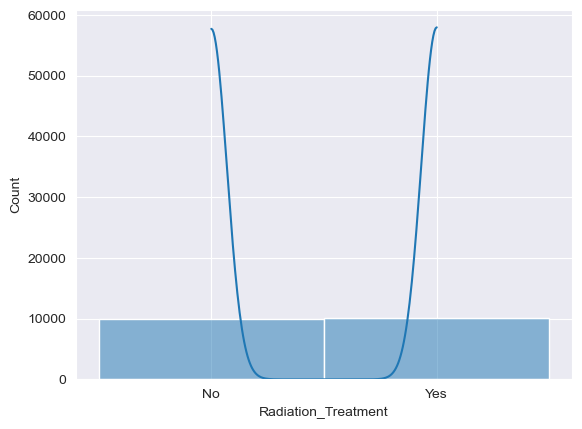

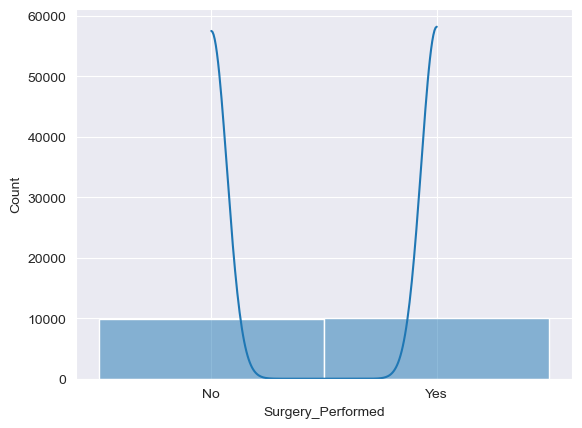

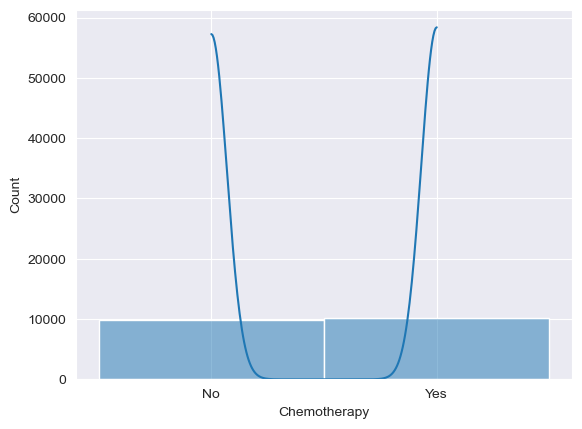

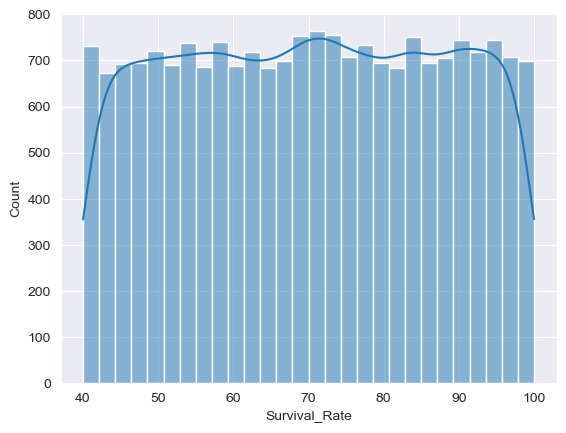

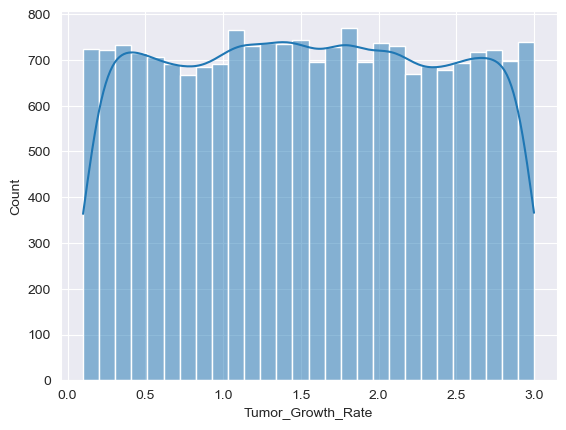

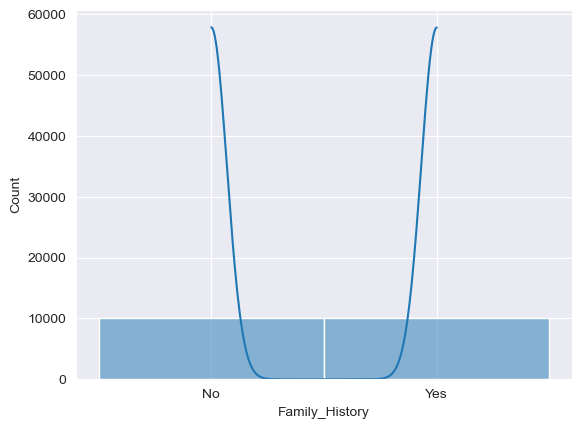

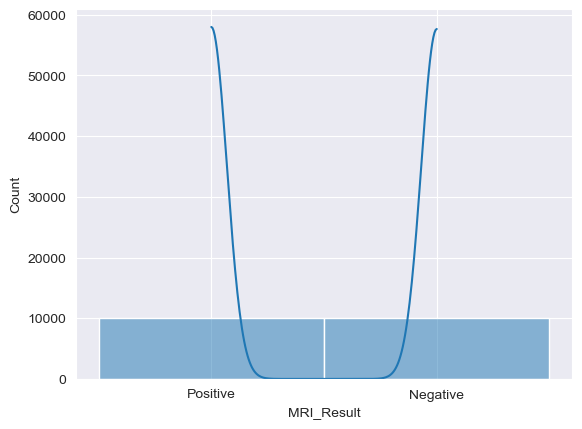

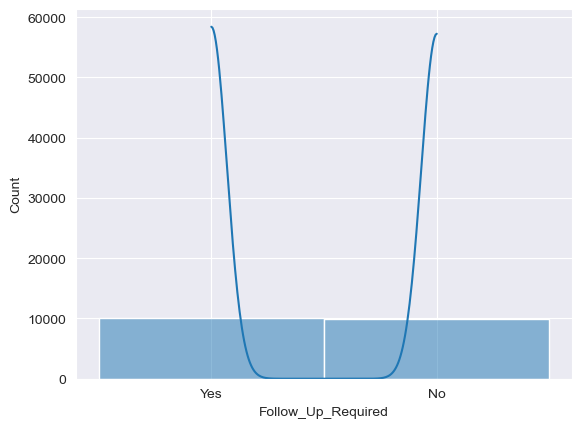

In [6]:
for col in df.columns:
    sns.histplot(data = df, x=col, kde=30)
    plt.show()

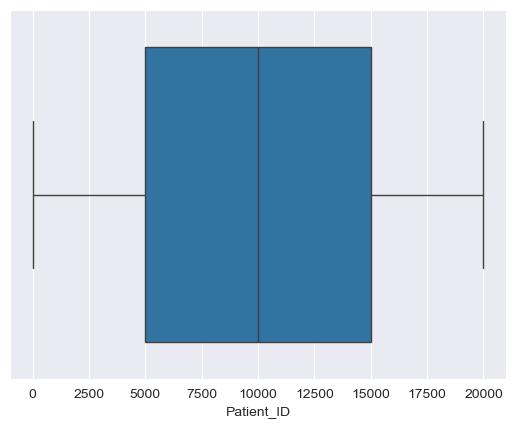

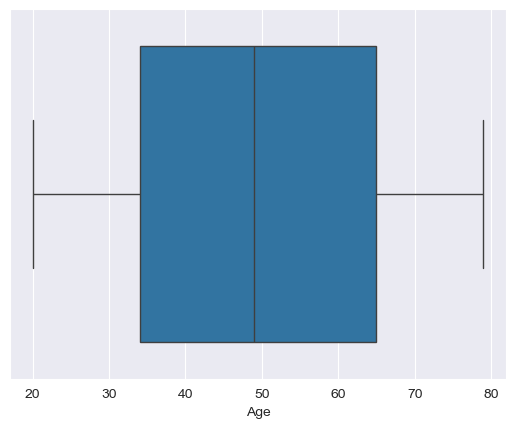

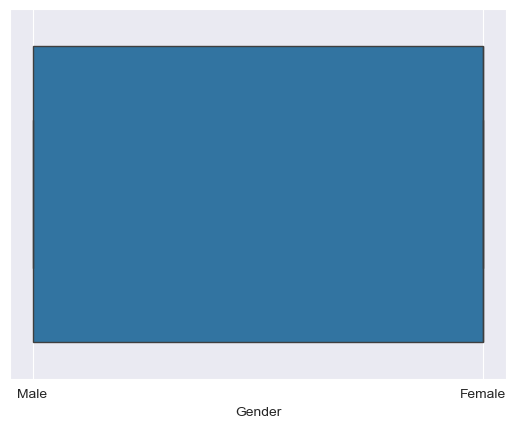

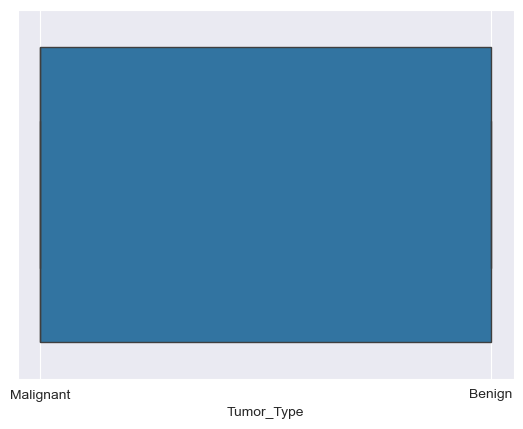

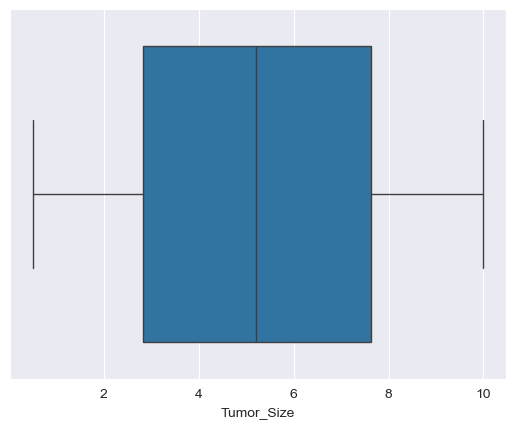

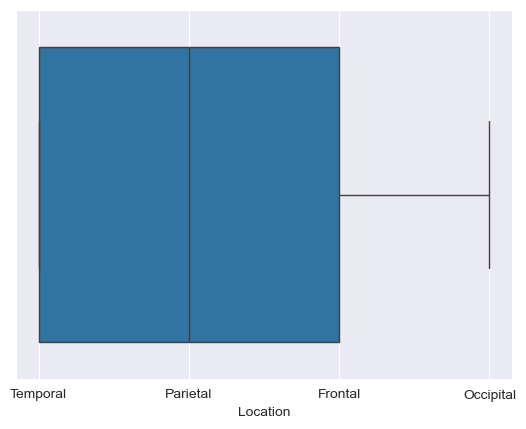

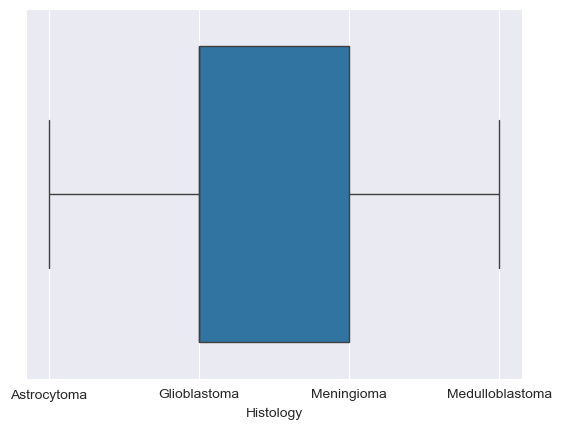

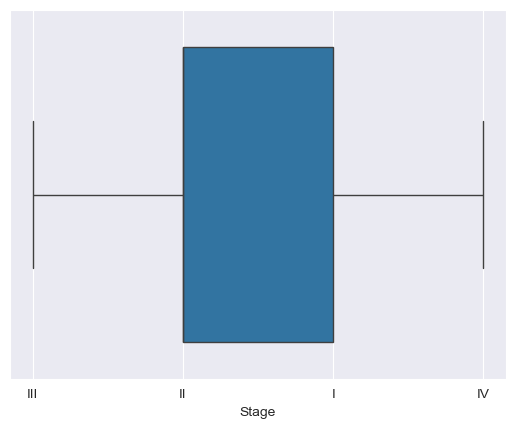

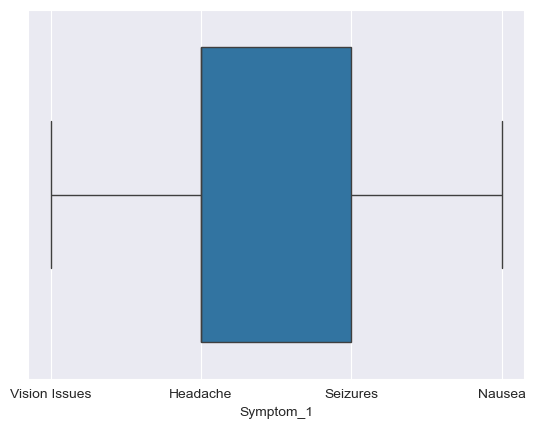

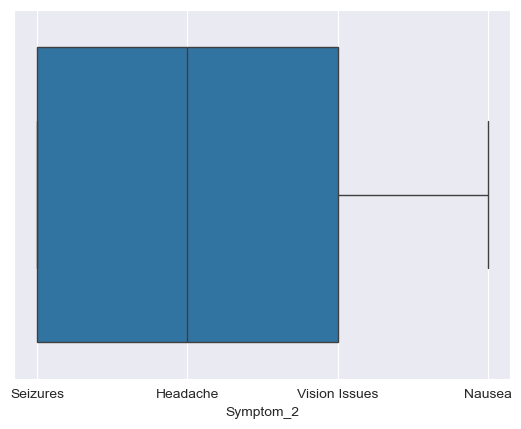

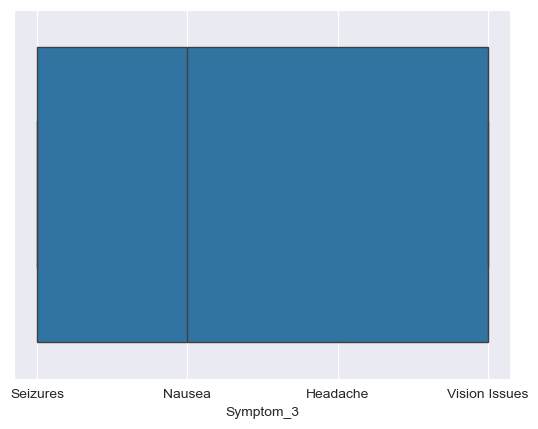

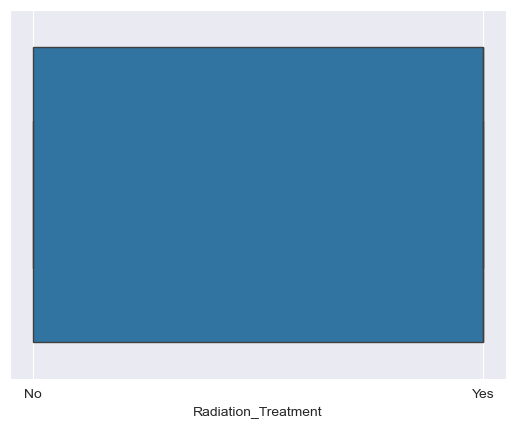

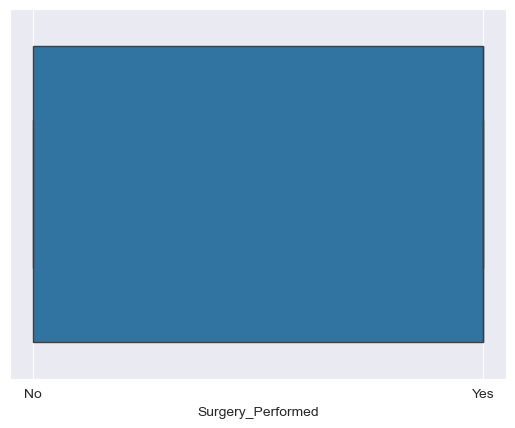

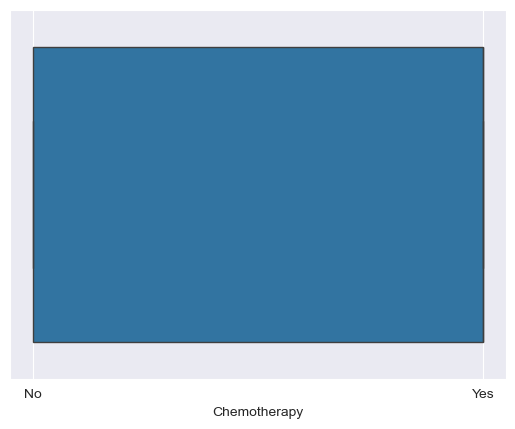

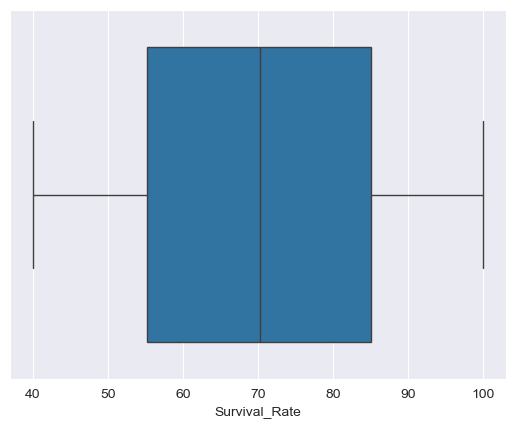

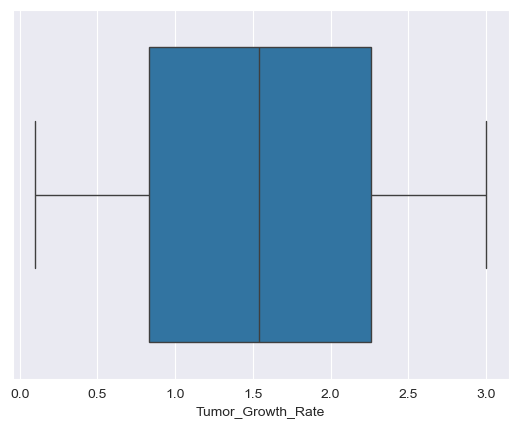

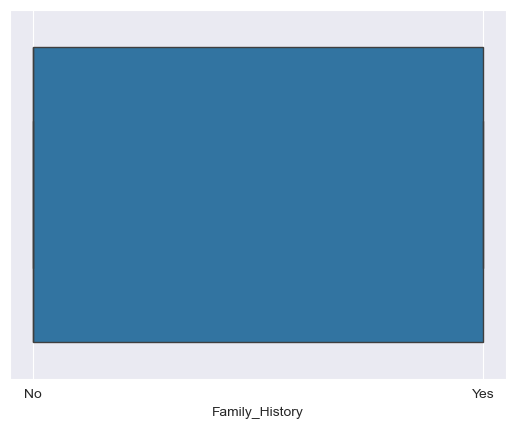

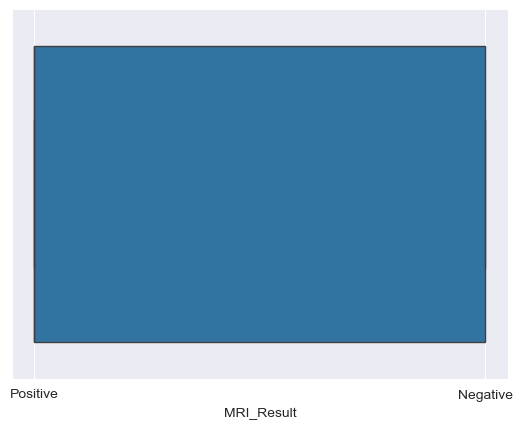

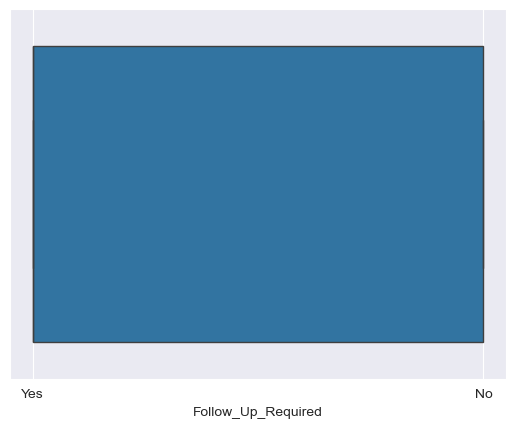

In [7]:
for col in df.columns:
    sns.boxplot(data = df, x=col)
    plt.show()

In [8]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)


['Gender', 'Tumor_Type', 'Location', 'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy', 'Family_History', 'MRI_Result', 'Follow_Up_Required']


In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [11]:

# Create the ordinal encoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the categorical columns
df[categorical_cols] = ordinal_encoder.fit_transform(df[categorical_cols])

# Optionally, store the encoder if you need it later
# You could save the encoder if you need to inverse transform later
# e.g., ordinal_encoder.categories_

# Standardize the numerical columns
#scaler = StandardScaler()
#df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Drop the ID column
df.drop('Patient_ID', axis=1, inplace=True)

print(df.head())
print(df.info())


   Age  Gender  Tumor_Type  Tumor_Size  Location  Histology  Stage  Symptom_1  \
0   73     1.0         1.0    5.375612       3.0        0.0    2.0        3.0   
1   26     1.0         0.0    4.847098       2.0        1.0    1.0        0.0   
2   31     1.0         0.0    5.588391       2.0        3.0    0.0        3.0   
3   29     1.0         1.0    1.436600       3.0        2.0    3.0        3.0   
4   54     0.0         0.0    2.417506       2.0        1.0    0.0        0.0   

   Symptom_2  Symptom_3  Radiation_Treatment  Surgery_Performed  Chemotherapy  \
0        2.0        2.0                  0.0                0.0           0.0   
1        0.0        1.0                  1.0                1.0           1.0   
2        0.0        2.0                  0.0                0.0           0.0   
3        2.0        0.0                  1.0                0.0           1.0   
4        0.0        2.0                  0.0                0.0           1.0   

   Survival_Rate  Tumor_Gr

In [12]:
df

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,73,1.0,1.0,5.375612,3.0,0.0,2.0,3.0,2.0,2.0,0.0,0.0,0.0,51.312579,0.111876,0.0,1.0,1.0
1,26,1.0,0.0,4.847098,2.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,46.373273,2.165736,1.0,1.0,1.0
2,31,1.0,0.0,5.588391,2.0,3.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,47.072221,1.884228,0.0,0.0,0.0
3,29,1.0,1.0,1.436600,3.0,2.0,3.0,3.0,2.0,0.0,1.0,0.0,1.0,51.853634,1.283342,1.0,0.0,0.0
4,54,0.0,0.0,2.417506,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,54.708987,2.069477,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,21,1.0,1.0,9.612013,2.0,2.0,2.0,2.0,1.0,3.0,0.0,0.0,1.0,58.229662,0.353806,0.0,0.0,1.0
19996,32,0.0,0.0,1.543560,3.0,3.0,2.0,0.0,0.0,3.0,1.0,1.0,0.0,77.706856,2.341074,0.0,1.0,0.0
19997,57,0.0,0.0,3.618634,3.0,2.0,0.0,2.0,3.0,1.0,0.0,0.0,1.0,89.543803,2.332881,0.0,1.0,1.0
19998,68,1.0,1.0,8.519086,2.0,1.0,2.0,2.0,0.0,3.0,1.0,1.0,1.0,83.306781,2.387202,0.0,1.0,0.0


In [13]:
df.describe()

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,49.433700,0.499200,0.50150,5.236552,1.515050,1.503700,1.495150,1.494950,1.504800,1.504350,0.501050,0.503000,0.504850,70.131699,1.547701,0.499900,0.50145,0.505050
std,17.389296,0.500012,0.50001,2.754359,1.119882,1.115952,1.115992,1.118185,1.118722,1.116308,0.500011,0.500004,0.499989,17.270834,0.835995,0.500012,0.50001,0.499987
min,20.000000,0.000000,0.00000,0.500410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.002386,0.100017,0.000000,0.00000,0.000000
25%,34.000000,0.000000,0.00000,2.836686,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,55.224439,0.830433,0.000000,0.00000,0.000000
50%,49.000000,0.000000,1.00000,5.200675,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,70.305066,1.541821,0.000000,1.00000,1.000000
75%,65.000000,1.000000,1.00000,7.624299,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,85.043395,2.262484,1.000000,1.00000,1.000000
max,79.000000,1.000000,1.00000,9.999420,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,99.998125,2.999835,1.000000,1.00000,1.000000


In [14]:
print(df[categorical_cols].nunique())

Gender                 2
Tumor_Type             2
Location               4
Histology              4
Stage                  4
Symptom_1              4
Symptom_2              4
Symptom_3              4
Radiation_Treatment    2
Surgery_Performed      2
Chemotherapy           2
Family_History         2
MRI_Result             2
Follow_Up_Required     2
dtype: int64


In [15]:
df['Follow_Up_Required'].value_counts()

Follow_Up_Required
1.0    10101
0.0     9899
Name: count, dtype: int64

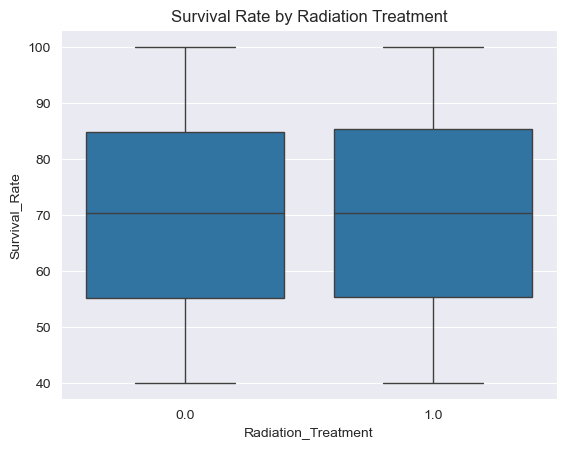

In [16]:
sns.boxplot(x='Radiation_Treatment', y='Survival_Rate', data=df)
plt.title('Survival Rate by Radiation Treatment')
plt.show()


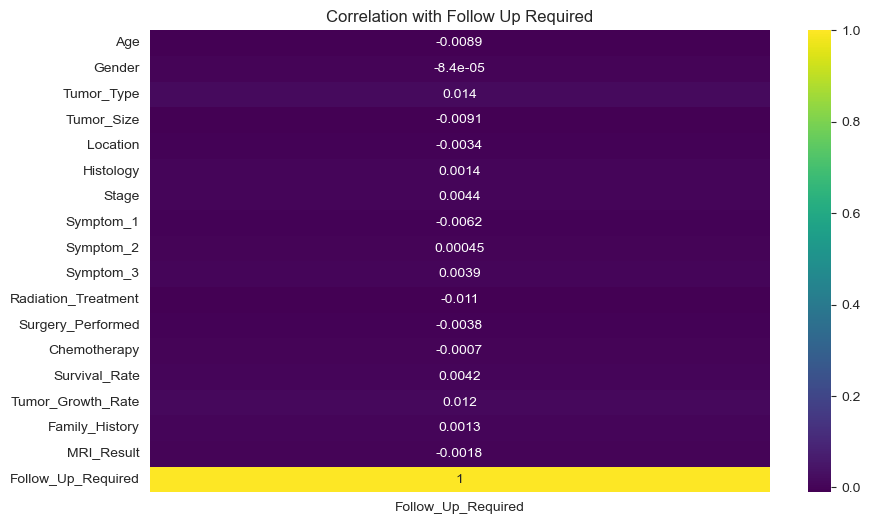

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr()[['Follow_Up_Required']], annot=True, cmap='viridis')
plt.title('Correlation with Follow Up Required')
plt.show()


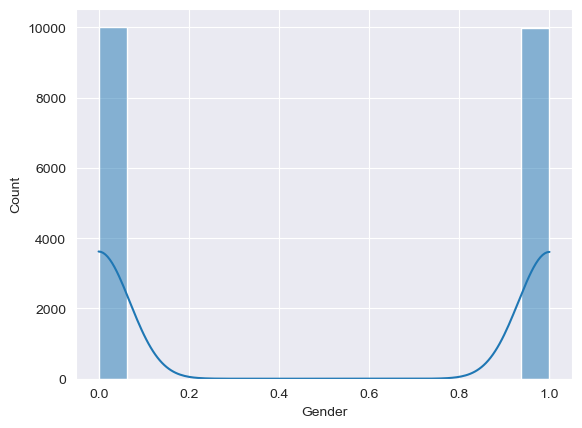

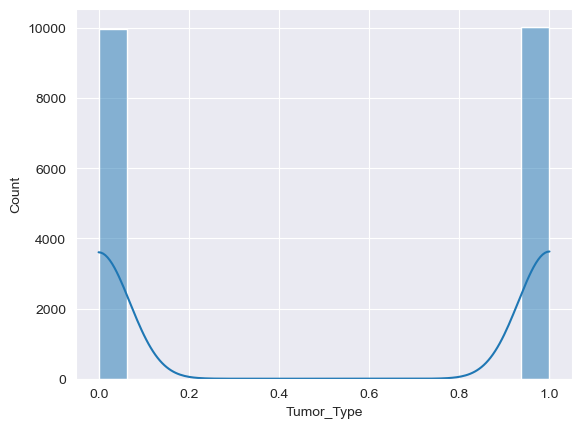

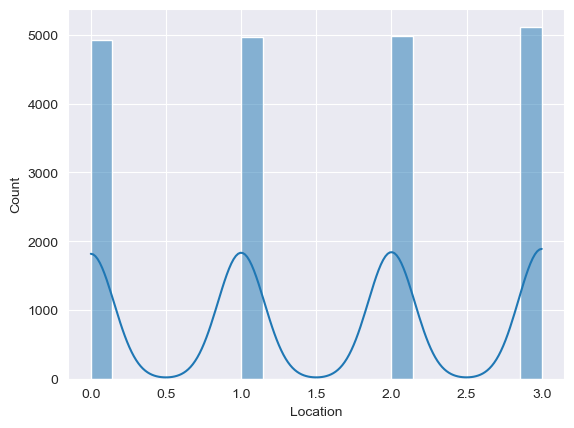

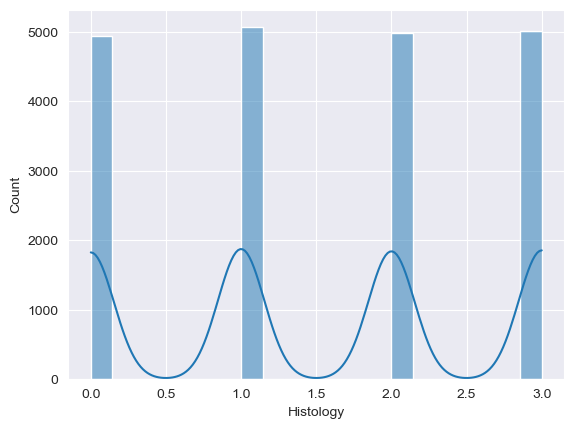

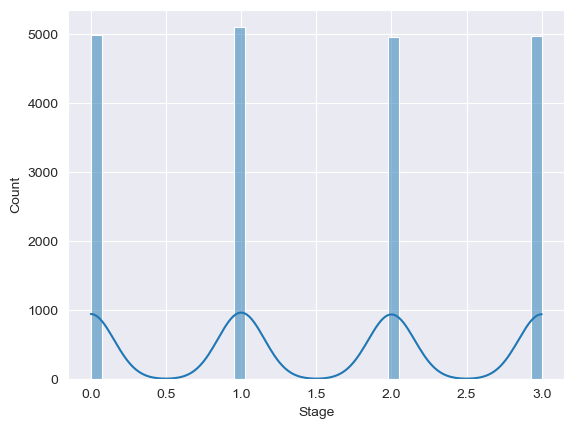

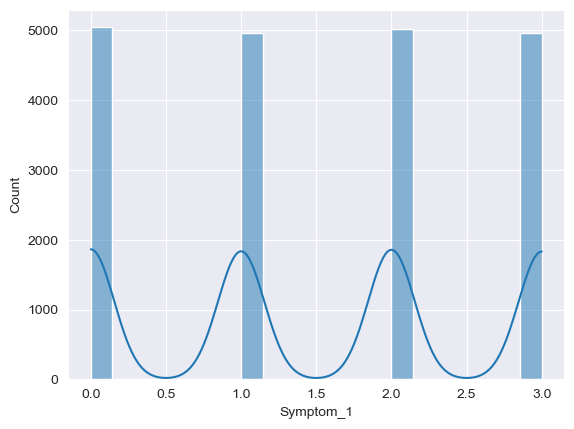

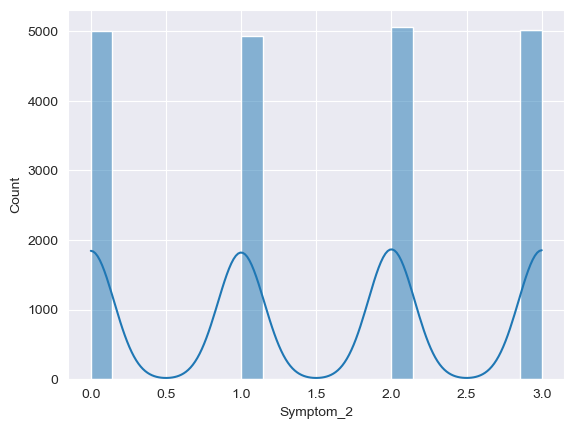

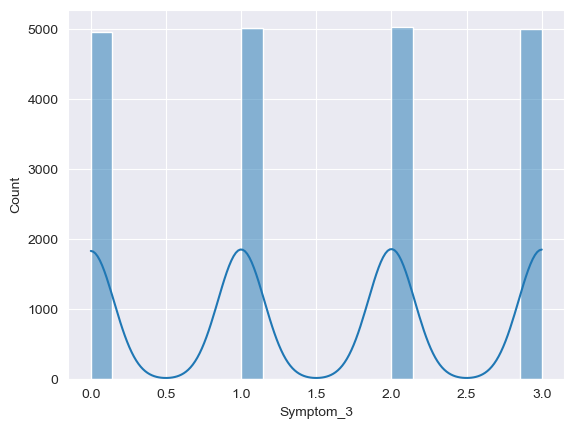

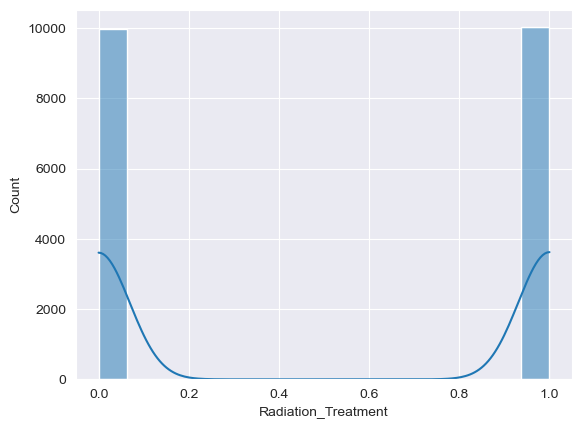

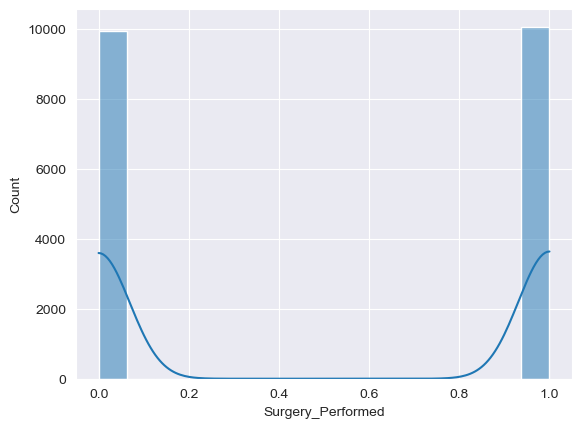

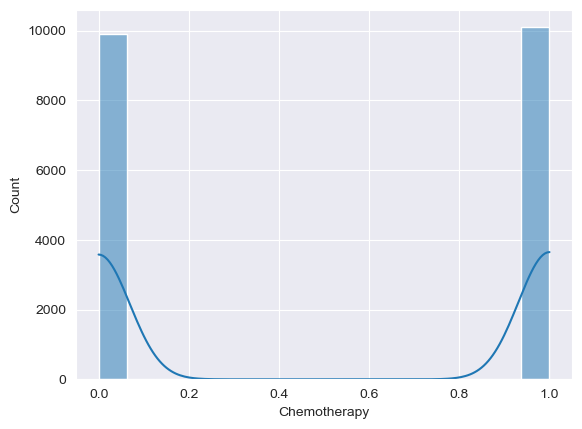

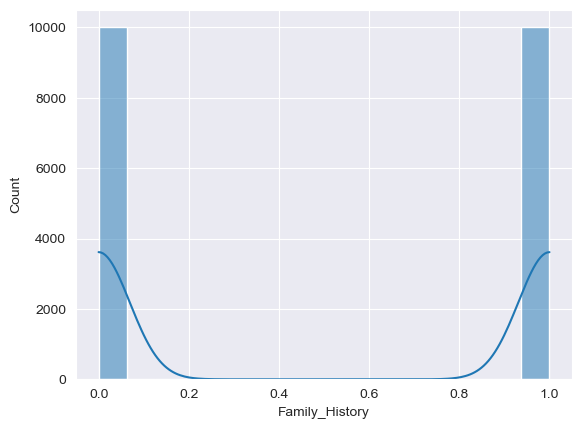

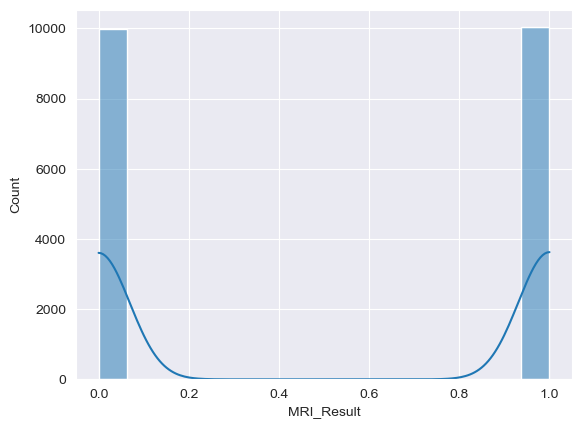

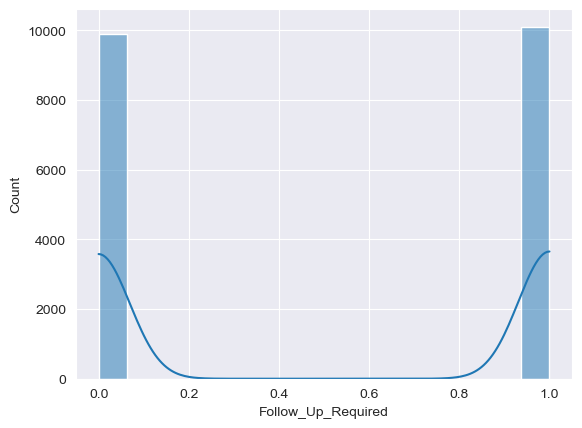

In [18]:
for col in categorical_cols:
    sns.histplot(data = df, x=col, kde=30)
    plt.show()

In [19]:
X = df.drop('Follow_Up_Required', axis=1)
y = df['Follow_Up_Required']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
X_train

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result
17218,69,1.0,0.0,1.466639,1.0,1.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,88.554940,1.760554,0.0,1.0
15188,74,1.0,1.0,1.231541,3.0,1.0,2.0,1.0,3.0,0.0,1.0,0.0,1.0,89.613276,2.310762,1.0,0.0
11295,31,1.0,0.0,5.340939,1.0,0.0,3.0,0.0,1.0,2.0,0.0,0.0,1.0,40.636728,2.673835,1.0,0.0
19772,33,1.0,0.0,0.521783,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,87.864727,1.522874,1.0,0.0
13072,54,1.0,1.0,4.714079,3.0,0.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,79.154867,2.901818,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,53,0.0,1.0,8.574564,0.0,3.0,0.0,0.0,3.0,2.0,0.0,1.0,1.0,64.500978,1.801410,0.0,0.0
11964,30,0.0,0.0,8.542621,1.0,1.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,59.811256,2.859699,0.0,0.0
5390,39,0.0,1.0,4.494778,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,83.809921,2.680145,0.0,0.0
860,38,1.0,0.0,1.018247,3.0,3.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,97.815429,1.272110,0.0,0.0


In [22]:
X_test

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result
10650,60,1.0,1.0,4.185355,3.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,94.739701,0.128492,0.0,1.0
2041,29,0.0,1.0,6.391747,3.0,3.0,0.0,1.0,3.0,2.0,1.0,0.0,1.0,49.751461,1.724219,1.0,1.0
8668,28,1.0,1.0,1.129997,2.0,1.0,3.0,3.0,2.0,3.0,1.0,1.0,1.0,95.452798,1.228702,1.0,1.0
1114,69,0.0,0.0,2.188328,3.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,92.178737,1.096059,0.0,0.0
13902,69,0.0,1.0,5.847122,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,90.654556,2.415105,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4464,45,0.0,1.0,4.840083,2.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,54.102919,0.188170,1.0,1.0
15656,28,0.0,1.0,3.469303,2.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,44.129585,2.904345,1.0,1.0
19146,70,0.0,0.0,5.425820,3.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,81.490349,2.716306,1.0,1.0
10567,31,0.0,1.0,7.958618,2.0,3.0,1.0,3.0,2.0,2.0,0.0,1.0,1.0,55.822710,2.608976,0.0,0.0


In [23]:
# Assuming you want to binarize survival rate into two categories (yes/no follow-up)
y_train = (y_train > 0.5).astype(int)  # or any other threshold for your dataset
y_test = (y_test > 0.5).astype(int)    # same for test set


In [24]:
y_test


10650    1
2041     0
8668     1
1114     1
13902    1
        ..
4464     1
15656    0
19146    1
10567    1
9165     1
Name: Follow_Up_Required, Length: 6000, dtype: int32

In [25]:
y_train

17218    1
15188    1
11295    1
19772    0
13072    1
        ..
11284    0
11964    0
5390     1
860      0
15795    0
Name: Follow_Up_Required, Length: 14000, dtype: int32

In [27]:
rfc_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rfc_pipeline.fit(X_train, y_train)

y_pred = rfc_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(classification_report(y_test, y_pred))



cat_pipeline = Pipeline([
    ('classifier', CatBoostClassifier(iterations=1000, learning_rate=0.03, depth=8, verbose=0, random_state=42))
])

cat_pipeline.fit(X_train, y_train)

y_pred = cat_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



xgb_pipeline = Pipeline([
    ('classifier', XGBClassifier(n_estimators=100, random_state=42))
])

xgb_pipeline.fit(X_train, y_train)

y_pred = xgb_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.5041666666666667
Confusion Matrix:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      2971
           1       0.51      0.51      0.51      3029

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.50      0.50      0.50      6000

Accuracy: 0.5126666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      2971
           1       0.52      0.54      0.53      3029

    accuracy                           0.51      6000
   macro avg       0.51      0.51      0.51      6000
weighted avg       0.51      0.51      0.51      6000

Accuracy: 0.5175
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      2971
           1       0.52      0.53      0.52      3029

    accuracy                           0.52

In [28]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
    depth = trial.suggest_int('depth', 3, 10)
    
    model = CatBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        depth=depth,
        verbose=0,
        random_state=42
    )
    
    return cross_val_score(model, X_train, y_train, scoring='accuracy', cv=3).mean()